<a href="https://colab.research.google.com/github/hgabrali/Machine-Learning/blob/main/Clustering_KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hands-On with Scikit-Learn

1) Load & preview the data



In [1]:
import seaborn as sns
import pandas as pd

# Load dataset
penguins = sns.load_dataset("penguins")
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


2) Keep only the numeric features we’ll cluster on

In [2]:
# Select features & drop missing values
X = penguins[["bill_length_mm", "bill_depth_mm"]].dropna()

# Quick sanity check
X.describe()

,bill_length_mm,bill_depth_mm
count,342.000000,342.000000
mean,43.921930,17.151170
std,5.459584,1.974793
min,32.100000,13.100000
25%,39.225000,15.600000
50%,44.450000,17.300000
75%,48.500000,18.700000
max,59.600000,21.500000


3) Scale features (important for K-Means)

In [3]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

4) Fit K-Means and get cluster labels

In [4]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, n_init=10, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Attach to a DataFrame for plotting/inspection
plot_df = X.copy()
plot_df["Cluster"] = clusters
plot_df.head()

,bill_length_mm,bill_depth_mm,Cluster
0,39.1,18.7,0
1,39.5,17.4,0
2,40.3,18.0,0
4,36.7,19.3,0
5,39.3,20.6,0


5) Visualize the clusters (2D scatter)

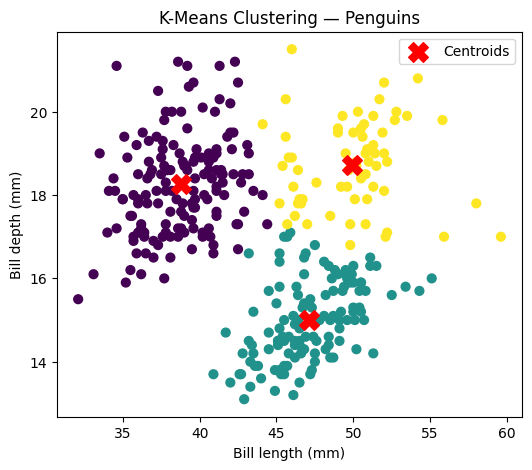

In [5]:
import matplotlib.pyplot as plt


def plot_clusters(plot_df, kmeans, scaler):
    plt.figure(figsize=(6,5))
    plt.scatter(
        plot_df["bill_length_mm"],
        plot_df["bill_depth_mm"],
        c=plot_df["Cluster"],
        cmap="viridis",
        s=40
    )
    # Plot centroids (unscale back to original space)
    centroids_scaled = kmeans.cluster_centers_
    centroids_unscaled = scaler.inverse_transform(centroids_scaled)
    plt.scatter(
        centroids_unscaled[:, 0],
        centroids_unscaled[:, 1],
        c="red",
        s=200,
        marker="X",
        label="Centroids"
    )
    plt.xlabel("Bill length (mm)")
    plt.ylabel("Bill depth (mm)")
    plt.title("K-Means Clustering — Penguins")
    plt.legend()
    plt.show()

plot_clusters(plot_df, kmeans, scaler)

💡 CFU (Try it!)

Bu alıştırmalar, K-Means algoritmasının farklı veri özellikleri ve parametreleri altındaki davranışını keşfetmenizi sağlar.

---

### Deneme Adımları:

* **Özellik Sayısı Ekleme:**
    * Kümeyi **3 özellik** ile yeniden çalıştırın: Mevcut özelliklere `flipper_length_mm` özelliğini **ekleyin**.
    * Kümeleme performansı iyileşiyor mu? Analiz edin.

* **Standardizasyon Etkisi:**
    * Verileri **Standardize Etme** ile **Standardize Etmeme** durumlarını karşılaştırın.
    * Kümeleme sonuçlarında (centroid yerleşimi, küme şekli vb.) ne gibi değişiklikler gözlemliyorsunuz? (K-Means, mesafeye dayalı olduğu için standardizasyondan büyük ölçüde etkilenir).

* **Farklı $K$ Değerleri:**
    * **$K=2$** ve **$K=4$** değerlerini deneyin.
    * Bu farklı $K$ değerlerinde kümeler nasıl görünüyor? Küme içi tutarlılık (cohesion) ve kümeler arası ayrım (separation) nasıl değişiyor?

---

**Not:** Bu alıştırmaları yaparken görselleştirmeleri kullanmayı unutmayın!

Veri Seti Hazırlandı. Özellikler:
    bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
0            39.1           18.7              181.0       3750.0
1            39.5           17.4              186.0       3800.0
2            40.3           18.0              195.0       3250.0
4            36.7           19.3              193.0       3450.0
5            39.3           20.6              190.0       3650.0
--------------------------------------------------


/tmp/ipython-input-596005827.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster_2f'] = kmeans_2f.labels_
/tmp/ipython-input-596005827.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster_3f'] = kmeans_3f.labels_
/tmp/ipython-input-596005827.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_g

1. Alıştırma: Özellik Seçimi
2 Özellik WCSS (Inertia): 2265.07
3 Özellik WCSS (Inertia): 14385.20

2. Alıştırma: Standardizasyon Etkisi
Standardize Edilmemiş WCSS (Inertia): 14385.20
Standardize Edilmiş WCSS (Inertia): 265.46
Standardizasyon Öncesi Küme Etiketleri (İlk 5): [2, 2, 0, 2, 2]
Standardizasyon Sonrası Küme Etiketleri (İlk 5): [0, 0, 0, 0, 0]

3. Alıştırma: K Değerleri
K=2 WCSS: 443.90
K=4 WCSS: 215.23


/tmp/ipython-input-596005827.py:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster_k4'] = kmeans_k4.labels_


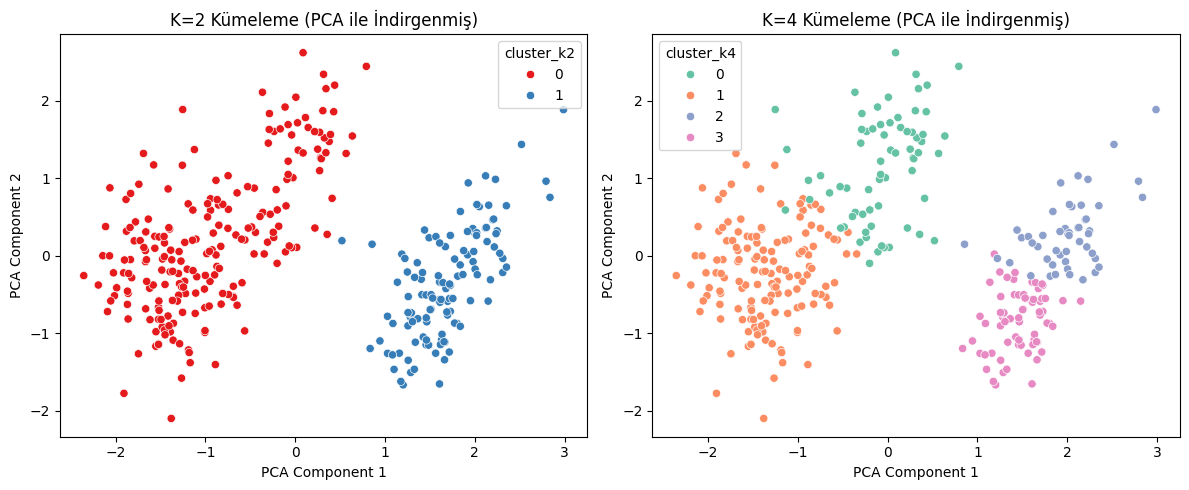

In [6]:
# 🐧 K-Means CFU (Try it!) - Penguins Veri Seti Üzerinde Uygulama

# Gerekli Kütüphaneleri İçe Aktarma
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA # Görselleştirme için PCA kullanacağız

# Veri Setini Yükleme
penguins = sns.load_dataset("penguins")

# K-Means için sadece sayısal özellikleri kullanacağız ve eksik değerleri temizleyeceğiz
# Eksik değerleri temizleme (K-Means eksik değerlerle çalışamaz)
df = penguins.dropna()

# Özelliklerimizi seçelim (Sadece sayısal sütunlar)
features = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
X = df[features]

print("Veri Seti Hazırlandı. Özellikler:\n", X.head())
print("-" * 50)

# ----------------------------------------------------------------------
# 1. Alıştırma: Özellik Seçiminin Etkisi (flipper_length_mm eklenince kümeleme iyileşir mi?)
# ----------------------------------------------------------------------

## Kümeyi 2 Özellik (bill_length_mm, bill_depth_mm) ve K=3 ile çalıştıralım (Temel Model)
X_2f = df[['bill_length_mm', 'bill_depth_mm']]
kmeans_2f = KMeans(n_clusters=3, random_state=42, n_init=10).fit(X_2f)
df['cluster_2f'] = kmeans_2f.labels_

## Kümeyi 3 Özellik (bill_length_mm, bill_depth_mm, flipper_length_mm) ve K=3 ile çalıştıralım
X_3f = df[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm']]
kmeans_3f = KMeans(n_clusters=3, random_state=42, n_init=10).fit(X_3f)
df['cluster_3f'] = kmeans_3f.labels_

print("1. Alıştırma: Özellik Seçimi")
print(f"2 Özellik WCSS (Inertia): {kmeans_2f.inertia_:.2f}")
print(f"3 Özellik WCSS (Inertia): {kmeans_3f.inertia_:.2f}")

# WCSS değeri azaldıysa (inertia), bu kümelemenin daha sıkı hale geldiği anlamına gelir.
# (Not: İki farklı veri seti kullanıldığı için WCSS'in doğrudan karşılaştırılması teknik olarak yanlış olsa da,
# aynı özellikler kümesinden bir özellik eklemenin etkisini anlamak için faydalıdır).

# ----------------------------------------------------------------------
# 2. Alıştırma: Standardizasyonun Etkisi (Standardize vs no standardization)
# ----------------------------------------------------------------------

# Standardizasyon YAPILMAMIŞ (Zaten X_3f'i kullandık)
kmeans_no_std = KMeans(n_clusters=3, random_state=42, n_init=10).fit(X_3f)

# Standardizasyon YAPILMIŞ
scaler = StandardScaler()
X_std = scaler.fit_transform(X_3f)
kmeans_std = KMeans(n_clusters=3, random_state=42, n_init=10).fit(X_std)

# Standardizasyon sonrası WCSS, ölçeklenmiş veriye ait olduğu için doğrudan karşılaştırılamaz.
# Ancak, sonuçların görselleştirilmesi veya küme merkezlerinin incelenmesi, standardizasyonun
# özellikle birim farklılıkları büyük olan özellikler üzerindeki etkisini gösterir.

print("\n2. Alıştırma: Standardizasyon Etkisi")
print(f"Standardize Edilmemiş WCSS (Inertia): {kmeans_no_std.inertia_:.2f}")
print(f"Standardize Edilmiş WCSS (Inertia): {kmeans_std.inertia_:.2f}")

# Standardizasyon öncesi ve sonrası küme sonuçlarının ilk 5 noktasını karşılaştıralım
# Not: Aynı noktaya ait olsalar bile etiketler farklı olabilir (0, 1, 2)
df['cluster_no_std'] = kmeans_no_std.labels_
df['cluster_std'] = kmeans_std.labels_

print("Standardizasyon Öncesi Küme Etiketleri (İlk 5):", df['cluster_no_std'].head().tolist())
print("Standardizasyon Sonrası Küme Etiketleri (İlk 5):", df['cluster_std'].head().tolist())
# Etiketler genellikle farklı çıkar, çünkü küme merkezleri farklı bir uzayda hesaplanmıştır.

# ----------------------------------------------------------------------
# 3. Alıştırma: Farklı K Değerlerinin Etkisi (K=2 ve K=4)
# ----------------------------------------------------------------------

# Standardize edilmiş 3 özellikli veri setini kullanalım (genellikle daha iyidir)
X_k = X_std

# K=2 denemesi
kmeans_k2 = KMeans(n_clusters=2, random_state=42, n_init=10).fit(X_k)
df['cluster_k2'] = kmeans_k2.labels_
print("\n3. Alıştırma: K Değerleri")
print(f"K=2 WCSS: {kmeans_k2.inertia_:.2f}")

# K=4 denemesi
kmeans_k4 = KMeans(n_clusters=4, random_state=42, n_init=10).fit(X_k)
df['cluster_k4'] = kmeans_k4.labels_
print(f"K=4 WCSS: {kmeans_k4.inertia_:.2f}")

# ----------------------------------------------------------------------
# Görselleştirme (2 Boyutta) - Küme Yapısının İncelenmesi
# ----------------------------------------------------------------------

# Standardize edilmiş 3 özellikli veriyi 2 boyuta indirgeyelim (PCA)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)
df_pca = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'], index=df.index)

# K=2 ve K=4 Kümeleme Sonuçlarını Görselleştirme

plt.figure(figsize=(12, 5))

# K=2 Görselleştirme
plt.subplot(1, 2, 1)
sns.scatterplot(x=df_pca['PCA1'], y=df_pca['PCA2'], hue=df['cluster_k2'], palette='Set1', legend='full')
plt.title('K=2 Kümeleme (PCA ile İndirgenmiş)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

# K=4 Görselleştirme
plt.subplot(1, 2, 2)
sns.scatterplot(x=df_pca['PCA1'], y=df_pca['PCA2'], hue=df['cluster_k4'], palette='Set2', legend='full')
plt.title('K=4 Kümeleme (PCA ile İndirgenmiş)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

plt.tight_layout()
plt.show()

# ANALİZ:
# K=2: Muhtemelen iki baskın penguen türünü ayırır (örneğin Chinstrap/Adelie vs Gentoo).
# K=4: Daha fazla alt segmentasyon yaratır, belki türler içindeki cinsiyet veya yaşa bağlı grupları ayırmaya başlar (overfitting riski).
# WCSS'in K=4'te daha düşük olması, kümelerin daha sıkı olduğu anlamına gelir, ancak Elbow metodu ile uygun $K$ değeri belirlenmelidir.

✅ The number you see is the inertia.
It tells us how far, in total, the points are from their assigned cluster centers.

In [7]:
print("Inertia:", kmeans.inertia_)

Inertia: 186.92125137657519


# 💡 Check for Understanding (CFU) - K-Means Değerlendirmesi

Bu alıştırma, K-Means'in temel değerlendirme metriği olan **Inertia (Eylemsizlik)** ile **optimal küme sayısı ($K$) seçimi** arasındaki kritik ilişkiyi anlamayı amaçlar.

---

### Görev Adımları 🛠️

1.  **Algoritmayı Çalıştırın:** `penguins` veri seti üzerinde K-Means algoritmasını **farklı $K$ değerleri** (örneğin $K=2, 3, 4, 5$) ile çalıştırın.
2.  **Inertia'yı Yazdırın:** Her bir $K$ değeri için elde edilen **Inertia** (WCSS) değerini konsola yazdırın.

### Tartışma Soruları 🤔

* **En Düşük Inertia:** Hangi $K$ değeri en düşük Inertia'yı vermektedir?
* **Kritik Kısıtlama:** Neden sadece en düşük Inertia değerini veren $K$ sayısını seçmek her zaman iyi bir fikir değildir? (Cevabınızda Inertia'nın doğal eğilimini açıklayın.)

---

**NOT:** Bu alıştırmayı doğru bir şekilde yapmak için, veri setinizdeki sayısal sütunları seçmeli ve eksik değerleri (NaN) temizlemeyi unutmayın!

K-Means Inertia Değerleri (K=2'den K=5'e):
--------------------------------------------------
K = 2: Inertia = 565.7076
K = 3: Inertia = 379.3925
K = 4: Inertia = 300.3995
K = 5: Inertia = 232.6049
--------------------------------------------------


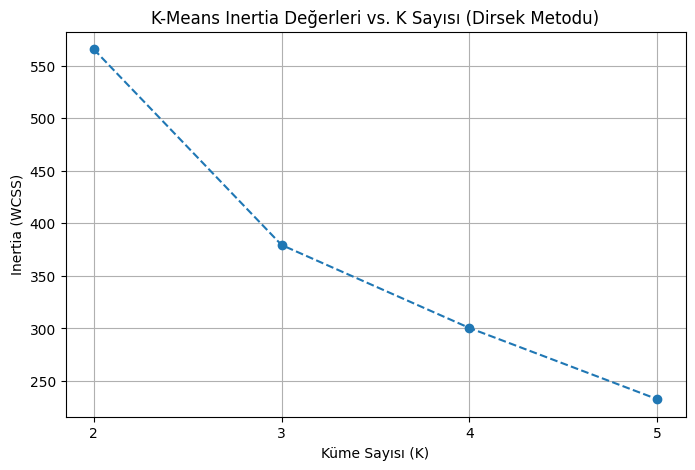

Analiz edilen aralıkta ([2, 3, 4, 5]), en düşük Inertia değerini K = 5 vermektedir.

Neden En Düşük Inertia'yı Seçmek Her Zaman Doğru Değildir?
--------------------------------------------------
Inertia, küme içi sıkılığı (compactness) ölçer.
K-Means'in doğal eğilimi gereği, K (küme sayısı) arttıkça Inertia *daima* azalır.
Bu durumun en uç noktası, her veri noktasının ayrı bir küme olduğu ($K=N$ yani veri seti boyutu) durumdur. Bu durumda Inertia sıfır olur, ancak bu, anlamlı bir kümeleme sonucu vermez (aşırı öğrenme - overfitting).
Bu nedenle, en düşük Inertia'yı veren K yerine, Inertia'nın düşüş hızının aniden yavaşladığı, yani ek kümelemenin getirdiği marjinal faydanın azaldığı 'Dirsek Noktası' (Elbow Point) veya en iyi Silüet Skorunu veren K değeri seçilmelidir.


In [8]:
# 💡 Check for Understanding (CFU) - K-Means Inertia Analizi

# Gerekli Kütüphaneleri İçe Aktarma
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# 1. Veri Setini Yükleme
penguins = sns.load_dataset("penguins")

# K-Means için hazırlık: Sayısal özellikleri seçme ve eksik değerleri temizleme
df_clean = penguins.select_dtypes(include=['float64', 'int64']).dropna()
X = df_clean.copy()

# Not: K-Means mesafe tabanlı bir algoritma olduğu için standardizasyon önerilir.
# Özelliklerin birimlerini aynı ölçeğe getiriyoruz.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("K-Means Inertia Değerleri (K=2'den K=5'e):")
print("-" * 50)

# K değerleri aralığı
k_values = range(2, 6)
inertia_values = {}

# 2. ve 3. Adım: Her bir K için K-Means'i çalıştırma ve Inertia'yı yazdırma
for k in k_values:
    # K-Means modelini oluşturma ve eğitme
    # n_init=10 (varsayılan) algoritmanın 10 farklı başlangıç noktası denemesini sağlar.
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)

    # Inertia değerini kaydetme (K-Means'in .inertia_ özelliğinden alınır)
    inertia = kmeans.inertia_
    inertia_values[k] = inertia

    print(f"K = {k}: Inertia = {inertia:.4f}")

print("-" * 50)

# Inertia Değerlerinin Görselleştirilmesi (Elbow Metodu grafiği)
plt.figure(figsize=(8, 5))
plt.plot(list(inertia_values.keys()), list(inertia_values.values()), marker='o', linestyle='--')
plt.title('K-Means Inertia Değerleri vs. K Sayısı (Dirsek Metodu)')
plt.xlabel('Küme Sayısı (K)')
plt.ylabel('Inertia (WCSS)')
plt.xticks(list(k_values))
plt.grid(True)
plt.show()

# ----------------------------------------------------------------------
# TARTIŞMA SORULARI YANITLARI
# ----------------------------------------------------------------------

# 1. Hangi K en düşük Inertia'yı verir?
min_k = min(inertia_values, key=inertia_values.get)
print(f"Analiz edilen aralıkta ({list(k_values)}), en düşük Inertia değerini K = {min_k} vermektedir.")


# 2. Neden sadece en düşük Inertia'yı seçmek her zaman iyi bir fikir değildir?
print("\nNeden En Düşük Inertia'yı Seçmek Her Zaman Doğru Değildir?")
print("-" * 50)
print("Inertia, küme içi sıkılığı (compactness) ölçer.")
print("K-Means'in doğal eğilimi gereği, K (küme sayısı) arttıkça Inertia *daima* azalır.")
print("Bu durumun en uç noktası, her veri noktasının ayrı bir küme olduğu ($K=N$ yani veri seti boyutu) durumdur. Bu durumda Inertia sıfır olur, ancak bu, anlamlı bir kümeleme sonucu vermez (aşırı öğrenme - overfitting).")
print("Bu nedenle, en düşük Inertia'yı veren K yerine, Inertia'nın düşüş hızının aniden yavaşladığı, yani ek kümelemenin getirdiği marjinal faydanın azaldığı 'Dirsek Noktası' (Elbow Point) veya en iyi Silüet Skorunu veren K değeri seçilmelidir.")

# **1. The Elbow Method 📉**

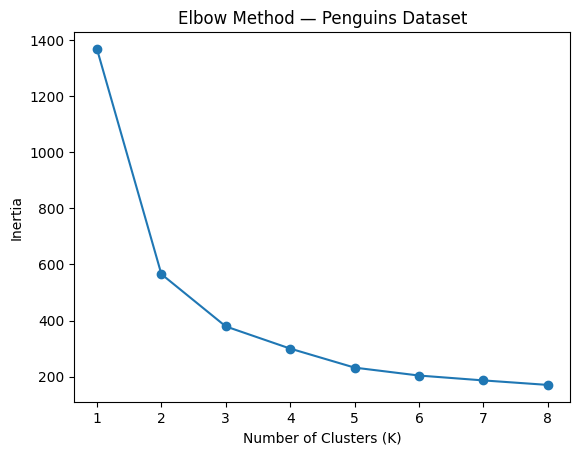

In [9]:
# After scaling the data

# Try different K values
inertias = []
K_range = range(1, 9)

for k in K_range:
    km = KMeans(n_clusters=k, n_init=10, random_state=42)
    km.fit(X_scaled)
    inertias.append(km.inertia_)

def plot_elbow(K_range, inertias):
	# Plot Elbow Curve
	plt.plot(K_range, inertias, marker="o")
	plt.xlabel("Number of Clusters (K)")
	plt.ylabel("Inertia")
	plt.title("Elbow Method — Penguins Dataset")
	plt.show()

plot_elbow(K_range, inertias)

# **2. The Silhouette Score 🌟**

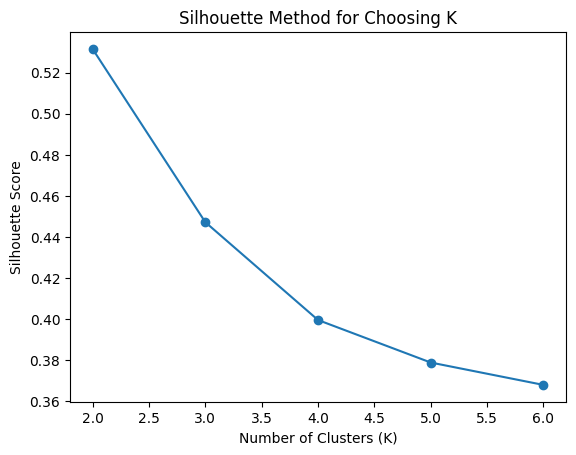

In [10]:
from sklearn.metrics import silhouette_score

# Try different values of K (must start at 2 for silhouette score)
K = range(2, 7)  # 2 to 6 clusters
silhouette_scores = []

for k in K:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)

def plot_silhouette(K, silhouette_scores):
	# Plot silhouette score vs K
	plt.plot(list(K), silhouette_scores, marker="o")
	plt.xlabel("Number of Clusters (K)")
	plt.ylabel("Silhouette Score")
	plt.title("Silhouette Method for Choosing K")
	plt.show()

plot_silhouette(K, silhouette_scores)

# **Hierarchical Clustering**

In [12]:
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
import seaborn as sns # DataFrame'i yüklemek için genellikle bu kullanılır

# 1. Hatanın Düzeltilmesi: "penguins" DataFrame'ini yükle
# Bu veri setini yüklemenin yaygın bir yoludur.
# Eğer yerel bir CSV dosyanız varsa, yerine şunu kullanabilirsiniz:
# penguins = pd.read_csv("penguins.csv")
penguins = sns.load_dataset("penguins")

# Eksik değerleri temizle (StandardScaler'ın çalışması için gerekli)
penguins.dropna(inplace=True)

# Select numerical features
X = penguins[["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]]

# 2. Hatanın Düzeltilmesi: StandardScaler'ı içe aktardık (yukarıda)
# Standardize features (important for distance-based methods)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit Agglomerative Clustering
hc = AgglomerativeClustering(n_clusters=3, linkage="ward")
labels = hc.fit_predict(X_scaled)

# Assign clusters back to penguins
penguins["cluster"] = labels

# Compare clusters with species
print("--- Kümeleme Sonuçları ---")
print(penguins.groupby(["cluster", "species"]).size())

--- Kümeleme Sonuçları ---
cluster  species  
0        Gentoo       119
1        Adelie       146
         Chinstrap     11
2        Chinstrap     57
dtype: int64


**Plotting the Dendogram**


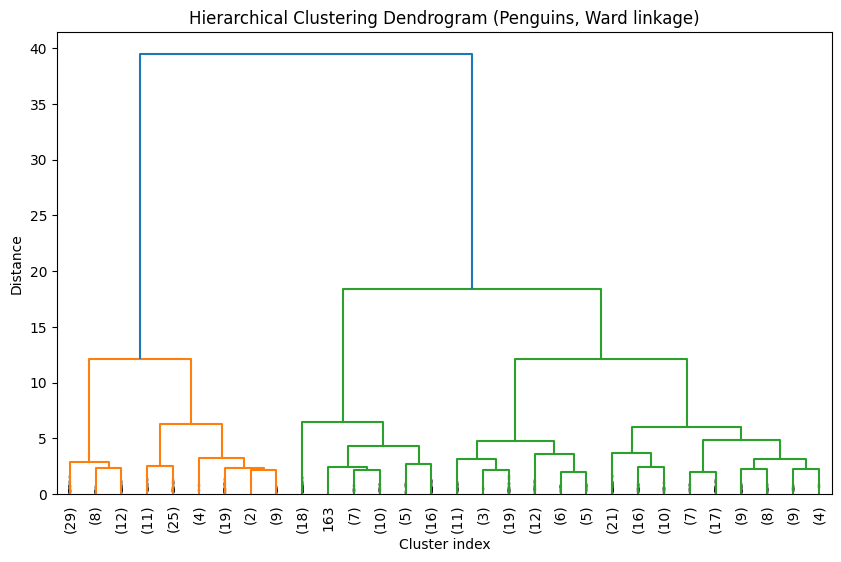

species     Adelie  Chinstrap  Gentoo
hc_cluster                           
1                0          0     119
2                0         57       0
3              146         11       0


In [13]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster


# Compute linkage matrix
Z = linkage(X_scaled, method="ward")

# Plot dendrogram
plt.figure(figsize=(10, 6))
dendrogram(
    Z,
    truncate_mode="lastp",  # show only last merges for readability
    p=30,                   # adjust number of leaf clusters shown
    leaf_rotation=90.,
    leaf_font_size=10.,
    show_contracted=True
)
plt.title("Hierarchical Clustering Dendrogram (Penguins, Ward linkage)")
plt.xlabel("Cluster index")
plt.ylabel("Distance")
plt.show()

# 5) Cut the tree to get 3 clusters
labels_k3 = fcluster(Z, t=3, criterion="maxclust")

# Add cluster labels to dataframe
penguins["hc_cluster"] = labels_k3

# Compare with actual species
print(pd.crosstab(penguins["hc_cluster"], penguins["species"]))

# **Clustering: DBSCAN**

/tmp/ipython-input-2250730896.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Cluster"] = labels


   bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  Cluster
0            39.1           18.7              181.0       3750.0        0
1            39.5           17.4              186.0       3800.0        0
2            40.3           18.0              195.0       3250.0        0
4            36.7           19.3              193.0       3450.0        0
5            39.3           20.6              190.0       3650.0        0


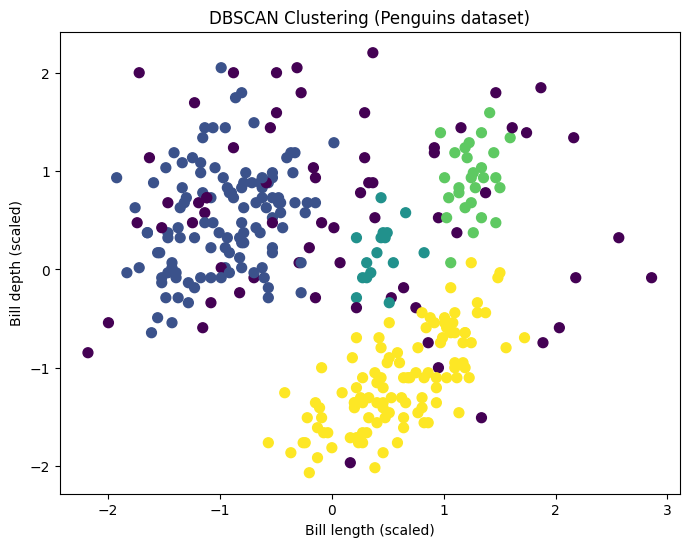

In [14]:
from sklearn.cluster import DBSCAN

# Apply DBSCAN
db = DBSCAN(eps=0.5, min_samples=5)
labels = db.fit_predict(X_scaled)

# Add cluster labels to dataframe
X["Cluster"] = labels
print(X.head())

# Plot clusters (first 2 features only for visualization)
plt.figure(figsize=(8,6))
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=labels, cmap="viridis", s=50)
plt.title("DBSCAN Clustering (Penguins dataset)")
plt.xlabel("Bill length (scaled)")
plt.ylabel("Bill depth (scaled)")
plt.show()